### 🔹 Objective
Build a **Spam Classifier** that automatically detects whether an SMS message is **spam** or **ham (not spam)** using two machine learning algorithms:  
- **Logistic Regression**  
- **Decision Tree Classifier**

This project demonstrates text preprocessing, feature extraction (TF-IDF), model training, evaluation, and comparison.

---

### 💡 What Is a Spam Classifier?
A **Spam Classifier** is a **binary classification model** that distinguishes:
- **Spam (1)** → unwanted or promotional messages  
- **Ham (0)** → legitimate or normal messages  

The model learns patterns in the text — for example, words like *“free”, “win”, “prize”, “offer”* are often linked with spam.

---

### 🧠 Why Text Data Is Challenging
Unlike numerical data, text cannot be directly processed by ML algorithms.  
So, we need to **convert text into numerical features** — while still preserving its meaning.

---

### 🔸 Text Representation Techniques
#### 🧩 1. Bag of Words (BoW)
Represents each document as word counts — simple but ignores word order.  
Example:

| Text | love | python | hate | spam |
|------|------|---------|------|------|
| I love python | 1 | 1 | 0 | 0 |
| I hate spam | 0 | 0 | 1 | 1 |

#### 🧩 2. TF-IDF (Term Frequency – Inverse Document Frequency)
Improves BoW by weighting important words higher and common words lower.

\[
\text{TF-IDF} = TF \times \log\left(\frac{N}{df}\right)
\]

Where:  
- **TF** = term frequency in the document  
- **df** = number of documents containing the term  
- **N** = total number of documents  

Words like “free”, “win”, “offer” get high scores → strong spam indicators.

---

### ⚙️ Workflow Overview

1️⃣ **Load Dataset** → import spam.csv (Kaggle SMS Spam Collection)  
2️⃣ **Clean Text** → lowercase, remove punctuation & stopwords  
3️⃣ **Vectorize** → convert text to numbers using TF-IDF  
4️⃣ **Split Data** → training vs testing  
5️⃣ **Train Models** → Logistic Regression & Decision Tree  
6️⃣ **Evaluate** → accuracy, confusion matrix, precision, recall, F1-score  
7️⃣ **Visualize** → confusion matrices and accuracy comparison

---

### 💡 Model Choices
- **Logistic Regression** → fast, interpretable, works well on linearly separable text data  
- **Decision Tree** → handles nonlinear relations and feature interactions  

We’ll train both and compare which performs better in detecting spam.

---

### 📊 Expected Results
Typical accuracy on the SMS Spam dataset:
| Model | Accuracy | Precision | Recall | F1-Score |
|--------|-----------|------------|---------|----------|
| Logistic Regression | ~97% | 0.97 | 0.98 | 0.97 |
| Decision Tree | ~95% | 0.95 | 0.96 | 0.95 |

✅ Logistic Regression usually generalizes better and avoids overfitting.

---

### 🧩 Libraries Used
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("/Users/adityasingh/codes/week 6 project/data/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
X = df['message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [31]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)


In [32]:
tree_model = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_model.fit(X_train_tfidf, y_train)
y_pred_tree = tree_model.predict(X_test_tfidf)


In [33]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 {name} Performance")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)



📊 Logistic Regression Performance
Accuracy: 0.9632286995515695
Confusion Matrix:
 [[962   3]
 [ 38 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.75      0.85       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115


📊 Decision Tree Performance
Accuracy: 0.9533632286995516
Confusion Matrix:
 [[955  10]
 [ 42 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       965
           1       0.92      0.72      0.81       150

    accuracy                           0.95      1115
   macro avg       0.94      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



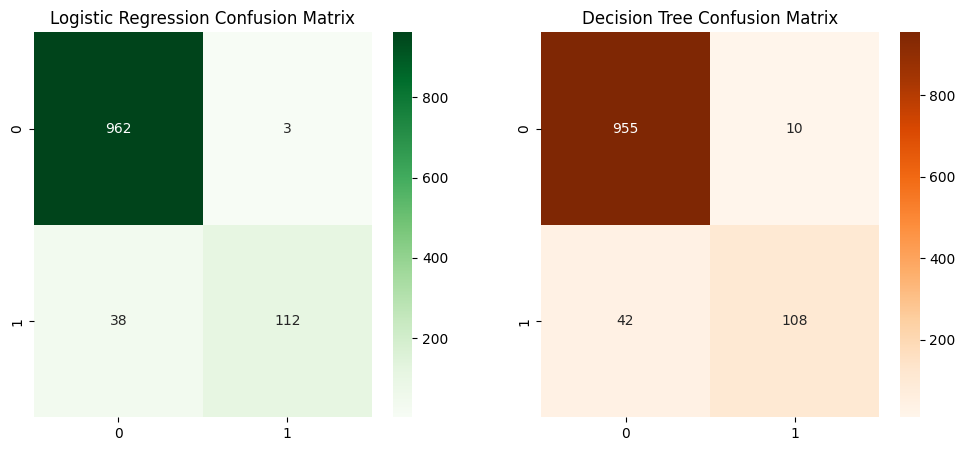

In [34]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges', ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
plt.show()


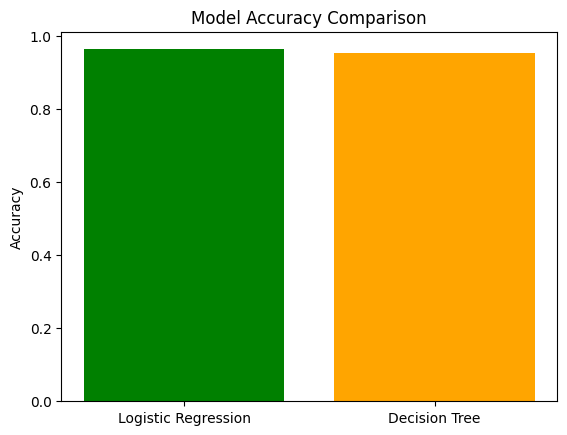

In [35]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)

plt.bar(["Logistic Regression", "Decision Tree"], [acc_log, acc_tree], color=['green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()
